# Computational Neuroscience Project

# Leaky Integrate and Fire Neuron Model


In [14]:
#Import Necessary Libraries
import numpy as np
from matplotlib.pyplot import *
import random
import math
from statistics import mode

# Implementing Currents Class


* Interval Current
* Linear Current
* Sin/Cos Current
* Constant Current
* Stepper Current

In [15]:
class Current:
    def __init__(self, i=5, c=5):
        self.i = i
        self.c = c
        
        
    def i_interval(self, time, interval = [30, 70]):
        """I(t) = i"""
        start, end = interval
        if start < time < end:
            return self.i
        return 0


    def i_linear(self, time):
        """I(t) = const.t"""
        return self.c * time


    def i_sin_cos(self, time):
        """I(t) = const.sin(t)/const.cos(t) """
        if self.c % 2 == 0:
            return self.c * math.sin(time)
        else :
            return self.c * math.cos(time)


    def i_constant(self, time):
        """I(t) = const"""
        return self.c


    def i_step(self, time, int1=[5, 40], int2=[45, 90]):
        """I(t) = interval1/interval2"""
        s1, e1 = int1
        s2, e2 = int2
        if s1 < time < e1 or s2 < time < e2:
            return self.i
        return 0

<img src="LIF.png" width=900 height=300 />

# Implementing LIF Model

In [16]:
class LIF:
    current = Current()
    def __init__(self, time_interval=100, dt=0.1, i_func=current.i_interval, u_rest=0, R=1, C=1, threshold=1):
        self.time_interval = time_interval
        self.dt = dt
        self.i_func = i_func
        self.u_rest = u_rest
        self.R = R
        self.C = C
        self.threshold = threshold
        self.u = []
        self.i_init = []
        self.timer = []
        
     #init u values
    def start(self):
        self.timer = np.arange(0, self.time_interval + self.dt, self.dt)
        u = [self.u_rest for i in range(len(self.timer))]
        self.i_init = [self.i_func(j) for j in self.timer]
        
        const = self.R * self.C
        for t in range(len(self.timer)):
            u[t] = u[t-1] + (((-u[t-1] + self.u_rest) + self.R * self.i_init[t]) * self.dt)/const
            #checking for action potential
            if u[t] >= self.threshold or u[t] < self.u_rest:
                u[t] = self.u_rest
        
        self.u = u
        
     #draw desire plot (u-t/i-t/f-i)   
    def draw_plot(self, plot_name='u-t'):
        
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Leaky Integrate and Fire\n\n\n' +
                     "R: " + str(self.R) +
                     "    C: " + str(self.C) +
                     "    I: " + (str(self.i_func.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) + 
                     '\n\n', fontsize=14, fontweight='bold')
        
        #checking for desire plots that want to draw it.
        if plot_name == 'u-t':
            subplot(221)
            plot(self.timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)
            
        if plot_name == 'i-t':
            subplot(221)
            plot(self.timer, self.i_init)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)
        
        
    def period_of_time(self, i_const=0):
        time_periods = []
        const = self.R * self.C
        u = [self.u_rest for i in range(len(self.timer))]
        curr = Current(c=i_const)
        i_const = curr.i_constant(self.time_interval)
        prev_period = 0
        for t in range(len(self.timer)):
            u[t] = u[t-1] + (((-u[t-1] + self.u_rest) + self.R * i_const) * self.dt)/const
            if u[t] >= self.threshold :
                u[t] = self.u_rest
                time_periods.append(self.timer[t] - prev_period)
                prev_period = self.timer[t]       
        return mode(time_periods)        
            
        
    def draw_F_I_plot(self):
        
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Leaky Integrate and Fire\n\n\n' +
                     "R: " + str(self.R) +
                     "    C: " + str(self.C) +
                     "    I: " + (str(self.i_func.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) + 
                     '\n\n', fontsize=14, fontweight='bold')   
        
        
        const = self.R * self.C
        i_x = np.arange(0, max(self.i_init), self.dt)
        i_y = [0 for _ in range(len(i_x))]
            
        #set y values in (try/catch) block for div by zero exception
        for j in range(len(i_x)):
            try:
                i_y[j] = 1 / (self.period_of_time(i_const=i_x[j]))
            except:
                i_y[j] = 0
                          
        subplot(221)
        plot(i_x, i_y)
        ylabel('F')
        xlabel('I')
        title('F - I plot')
        grid(True) 

<img src="Lif Equation.jpg" width=900 height=1000 />

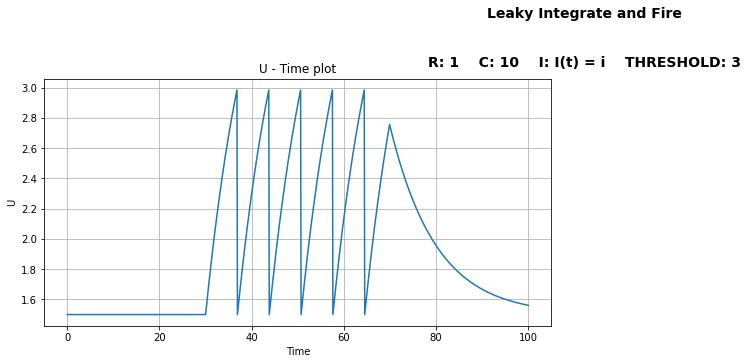

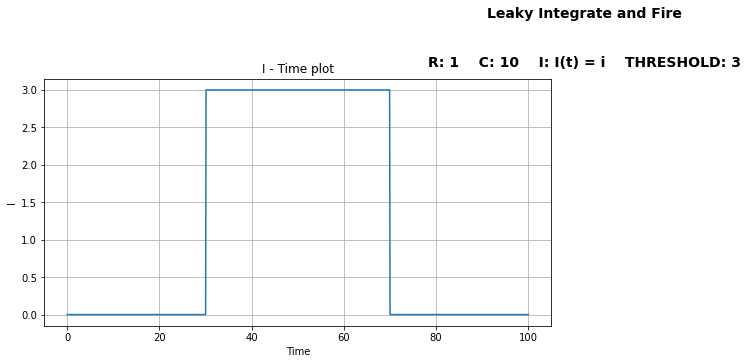

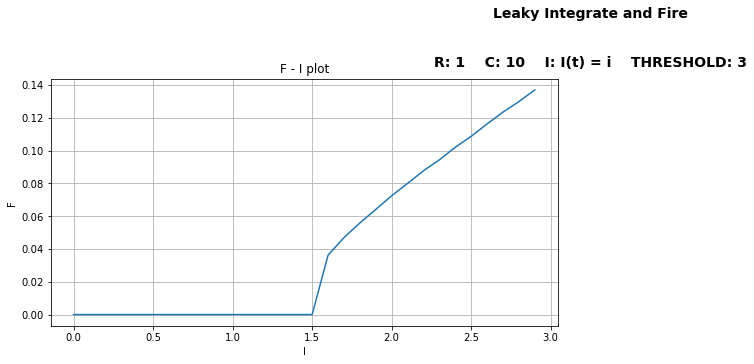

In [17]:
current = Current(i=3)
lif = LIF(i_func = current.i_interval, u_rest = 1.5, C = 10, threshold = 3)
lif.start()
lif.draw_plot(plot_name = 'u-t')
lif.draw_plot(plot_name = 'i-t')
lif.draw_F_I_plot()

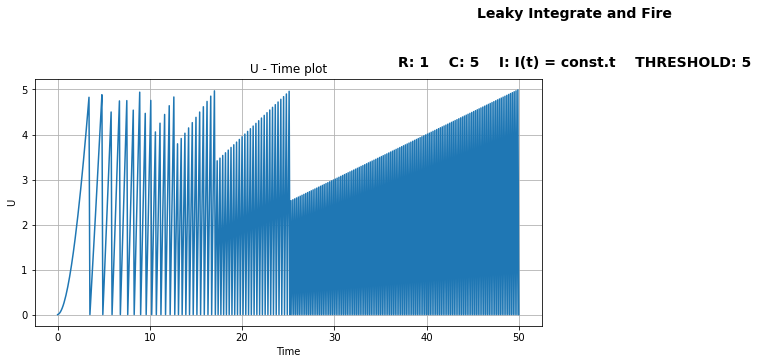

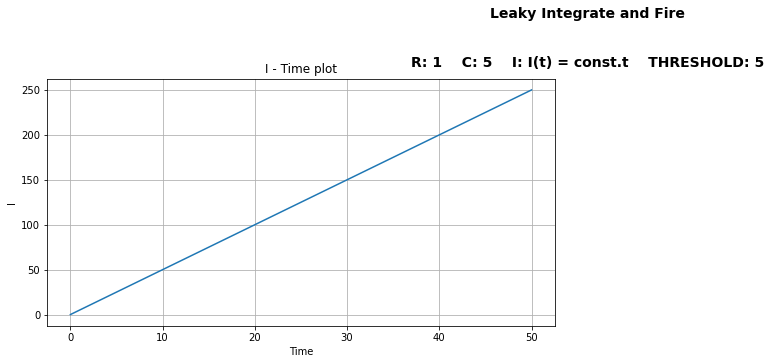

In [ ]:
current = Current(i=2, c=5)
lif = LIF(time_interval=50, i_func = current.i_linear, u_rest = 0, R=1, C = 5, threshold = 5)
lif.start()
lif.draw_plot(plot_name = 'u-t')
lif.draw_plot(plot_name = 'i-t')
lif.draw_F_I_plot()

In [ ]:
current = Current(i=3, c=10)
lif = LIF(time_interval=50, i_func = current.i_sin_cos, u_rest = 1, R=5, C = 2, threshold = 2)
lif.start()
lif.draw_plot(plot_name = 'u-t')
lif.draw_plot(plot_name = 'i-t')
lif.draw_F_I_plot()

In [ ]:
current = Current(i=3, c=9)
lif = LIF(time_interval=50, i_func = current.i_sin_cos, u_rest = 0, R=2, C = 2, threshold = 2)
lif.start()
lif.draw_plot(plot_name = 'u-t')
lif.draw_plot(plot_name = 'i-t')
lif.draw_F_I_plot()

In [ ]:
current = Current(i=2.5, c=5)
lif = LIF(time_interval=125, dt=0.125, i_func = current.i_constant, u_rest = 1, R=2, C = 4, threshold = 2.5)
lif.start()
lif.draw_plot(plot_name = 'u-t')
lif.draw_plot(plot_name = 'i-t')
lif.draw_F_I_plot()

In [ ]:
current = Current(i=5, c=10)
lif = LIF(time_interval=100, i_func = current.i_step, u_rest = 0, R=1, C = 5, threshold = 3)
lif.start()
lif.draw_plot(plot_name = 'u-t')
lif.draw_plot(plot_name = 'i-t')
lif.draw_F_I_plot()

# Mehrdad Baradaran std_id = 99222020